Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3
conn = sqlite3.connect('mydatabase')



In [8]:
pd.read_sql('select * from bike_stations b join yelp y on b.Station_Number = y.Nearest_Station join foursquare f on f.Nearest_Station = b.Station_Number', conn)

## Now if we want all our data we can join the 3 tables like this
## Because of the yelp api limitation we will end up with only 100 bike stations

,Station_Number,Latitude,Longitude,Free Bikes,Nearest_Station,Yelp_Results,Nearest_Station,Foursquare_Results
0,0,43.665269,-79.319796,9,0.0,24,0,11
1,1,43.671420,-79.445947,6,1.0,8,1,5
2,2,43.666224,-79.317693,17,2.0,23,2,12
3,3,43.653236,-79.376716,3,3.0,407,3,36
4,4,43.663722,-79.380288,3,4.0,269,4,22
...,...,...,...,...,...,...,...,...
95,95,43.659195,-79.329196,10,95.0,34,95,8
96,96,43.651885,-79.364900,17,96.0,105,96,16
97,97,43.682645,-79.377557,3,97.0,2,97,8
98,98,43.647500,-79.433056,4,98.0,55,98,9


In [14]:
pd.read_sql('select * from ratings join bike_stations on ratings.Nearest_Station = bike_stations.Station_Number WHERE Station_Number == 5 order by ratings.Rating desc limit 10' , conn)
## We can check top rated spots near where we will park our bike




,Name,Rating,Nearest_Station,Station_Number,Latitude,Longitude,Free Bikes
0,mogouyan-hand-pulled-noodles-toronto,4.5,5.0,5,43.657763,-79.389165,12
1,gyubee-japanese-grill-dundas-toronto,4.5,5.0,5,43.657763,-79.389165,12
2,yuugi-izakaya-toronto,4.5,5.0,5,43.657763,-79.389165,12
3,the-poké-box-toronto-5,4.5,5.0,5,43.657763,-79.389165,12
4,starbucks-toronto-154,4.5,5.0,5,43.657763,-79.389165,12
5,art-gallery-of-ontario-toronto-3,4.5,5.0,5,43.657763,-79.389165,12
6,dzo-viet-eatery-toronto,4.0,5.0,5,43.657763,-79.389165,12
7,koh-lipe-toronto-2,4.0,5.0,5,43.657763,-79.389165,12
8,sansotei-ramen-toronto-2,4.0,5.0,5,43.657763,-79.389165,12
9,adega-restaurante-toronto,4.0,5.0,5,43.657763,-79.389165,12


EDA and data cleaning

In [22]:
fulldf=pd.read_sql('select * from bike_stations b join yelp y on b.Station_Number = y.Nearest_Station join foursquare f on f.Nearest_Station = b.Station_Number', conn)
fulldf = fulldf.drop(columns=['Nearest_Station'])  ## There was a duplicate from the join that we can remove


In [23]:

print(fulldf.isnull().sum())         ## checking for nulls - everything looks good

Station_Number        0
Latitude              0
Longitude             0
Free Bikes            0
Yelp_Results          0
Foursquare_Results    0
dtype: int64


In [16]:
print( fulldf.duplicated().sum())  ## duplicate check also looks good

0


<Axes: xlabel='foursquare', ylabel='Count'>

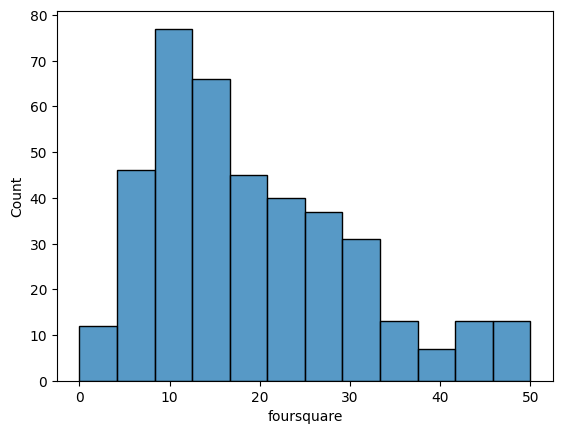

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(fulldf['Foursquare_Results'])  ## a quick check of the distribution reveals no crazy outliers

<Axes: xlabel='yelp', ylabel='Count'>

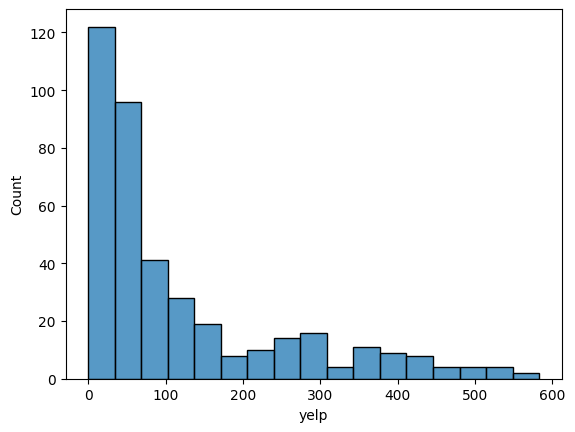

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(fulldf['Yelp_Results'])   ##  a quick check of the distribution reveals no crazy outliers

Since our data has no nulls , duplicates, or outliers, we can begin EDA

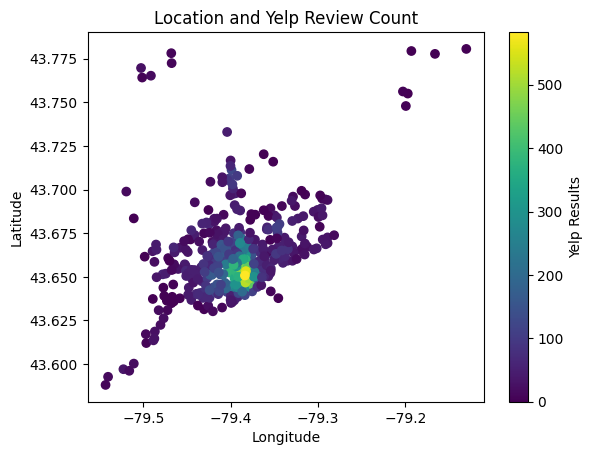

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.scatter(x=fulldf['Longitude'],y=fulldf["Latitude"], c = fulldf['Yelp_Results'])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location and Yelp Review Count')
plt.colorbar().set_label('Yelp Results')


## Here we can spot an initial pattern of the businesses clustering in certain areas.  We can use this as a hypothesis in our model- that location can predict the number of yelp results.


In [18]:
fulldf.describe(include='all')
## not much noteworthy here, but 7.775 average free bikes per station might be useful

,Station_Number,Latitude,Longitude,Free Bikes,Nearest_Station,Yelp_Results,Nearest_Station,Foursquare_Results
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,43.662432,-79.390137,7.790000,49.500000,123.010000,49.500000,19.380000
std,29.011492,0.016203,0.041406,6.462471,29.011492,137.718971,29.011492,10.490766
min,0.000000,43.631400,-79.467763,0.000000,0.000000,0.000000,0.000000,4.000000
25%,24.750000,43.652326,-79.417186,2.750000,24.750000,32.750000,24.750000,11.000000
50%,49.500000,43.661180,-79.392629,7.000000,49.500000,56.500000,49.500000,16.500000
75%,74.250000,43.671621,-79.370485,12.000000,74.250000,143.000000,74.250000,25.250000
max,99.000000,43.711215,-79.288949,35.000000,99.000000,531.000000,99.000000,50.000000


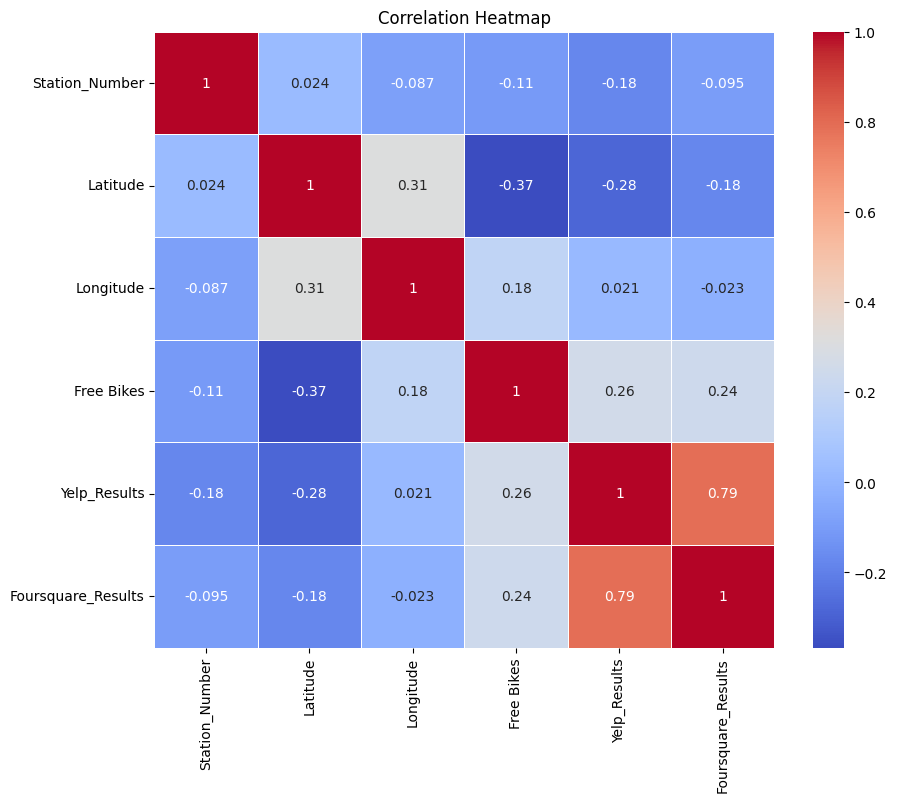

In [24]:
correlation_matrix = fulldf.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

## Here we can see on first glance that free_bikes is probably not a good predictor of anything, but we will test that in the model building
## yelp and foursquare results are highly correlated which makes sense but isnt useful
## 